# Creating a Network From Scratch

In [1]:
import numpy as np # NumPy only!
import matplotlib.pyplot as plt 
%matplotlib inline

## Q1. Implement the MLP class 

`fit` and `predict` methods inclided

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
    
class MLP:

    def __init__(self, input_size, hidden_dims=32, alpha=.2):
        '''
        Instantiate MLP using given parameters. 
        
        You may assume that there is only a single hidden layer
        (i.e., you need not generalize to handle arbitrary numbers of
        hidden layers).
        \alpha is the learning rate.
        '''
        self.hidden_dims= hidden_dims 
        print("There are {} hidden dimensions".format(self.hidden_dims))
        self.w1 = np.random.rand(input_size,self.hidden_dims) #w1 = [input_size x hidden_dims]
        self.w2 = np.random.rand(self.hidden_dims,1) #w2 = [hidden_dims x 1]
        self.bias1= np.random.rand(1,self.hidden_dims) 
        self.bias2= np.random.rand(1,1) 
        self.learn_rate= alpha
        print ("\nInitialized Weight Shapes:: w2=",self.w2.shape, "w1=", self.w1.shape )
        print ("\nInitialized Bias Shapes:: b2=",self.bias2.shape, "b1=", self.bias1.shape )
        print (" ")
        

    def sigmoid(self,x):
        """
        Params:
        ---

        x: nxd numpy array 

        Output:
        ---
        Result of Sigmoid "Squishing" Function: Array of vals in rang {0,1}
        """
        return 1/(1 + np.exp(-x))
    
        
    def log_loss(self,y,prediction,eps=1e-15):
        """
        Logistic Regression Loss Function Defined 

        Params:
        ---

        y= actual class (nx1 array)
        prediction= predicted class (nx1 array)

        Returns:
        Average of the loss for a entire set (epoch of data)
        """
        #return -1.0*(y*np.log(prediction)+(1-y)*np.log(1-prediction))
        prediction= np.clip(prediction, eps, 1 - eps)
        if y == 1:
            return -np.log(prediction)
        else:
            return -np.log(1 - prediction)
    
    def predict(self,X):
        """
        Compute the y_hat given a set of weights 
        """
        #output = y_hat 
        self.hidden_layer = self.sigmoid(np.dot(X,self.w1)+self.bias1) # hidden layer= sig(xW_1)
        # reshape self.hidden_layer ?
        y_hat= self.sigmoid(np.dot(self.hidden_layer,self.w2)+self.bias2) #sig(sig(xW_1)*W_2)
        return y_hat

    def loss_plot(self,train_loss):
        """
        Show Log Loss Plot 
        """
        plt.figure(1)
        plt.plot(range(len(train_loss)),train_loss,color='g')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title("Loss vs. Epoch")
        plt.draw()
        
    def accuracy_plot(self,train_accuracy,test_accuracy,train_color='g',test_color='b'):
        """
        Show Acc Loss Plot 
        """
        plt.plot(range(len(test_accuracy)),train_accuracy,color=train_color,label='Train Acc w/ {} hidden dims'.format(self.hidden_dims))
        plt.plot(range(len(test_accuracy)),test_accuracy,color=test_color,label='Test Acc w/ {} hidden dims'.format(self.hidden_dims))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title("Acc vs. Epoch")
        plt.legend()
        plt.draw()
        
    def convert_to_class(self,a):
        """
        Convert probabilities to class:: if p < .5, class 0, else class 1
        """
        return np.array([int(np.around(x)) for x in a])

        
    def fit(self, X, y, epochs=100,random_state=42,loss_func=False,verbose=False):
        '''
        Train the model via backprop for the specified number of epochs.
        '''

        print ("The shape of the data is: ",X.shape)
        print ("\n------------------------------")
        #Split the data 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=random_state)
        
        #store accuracy of train and test vals 
        training_loss=[]
        epoch_train_accuracy=[]
        self.epoch_train_accuracy=epoch_train_accuracy
        epoch_test_accuracy=[]
        self.epoch_test_accuracy=epoch_test_accuracy

        #for epoch 
        for epoch in range(epochs): #loop through all training data
            loss= []
            epoch_y_train=[]
            epoch_y_test=[]
            
            #iterate through each element in the batch
            for i,x in enumerate(X_train): 
                prediction= self.predict(x) #sig(weights*x) gives the class probaility 
                loss.append(self.log_loss(y_train[i],prediction)) #get the loss for row 
                
                #back prop 
                dw_2= (y_train[i]-prediction)*self.hidden_layer.T
                dw_1=np.dot(np.expand_dims(x,axis=1),((y_train[i]-prediction)*self.w2.T*self.hidden_layer*(1-self.hidden_layer)))
                db_2= y_train[i]-prediction
                db_1= ((y_train[i]-prediction)*self.w2.T*self.hidden_layer*(1-self.hidden_layer))
                
                #update weights (SGD)
                self.w1 += self.learn_rate*(dw_1/len(y_train))
                self.w2 += self.learn_rate*(dw_2/len(y_train))
                self.bias1 += self.learn_rate*(db_1/len(y_train))
                self.bias2 += self.learn_rate*(db_2/len(y_train))
       
                epoch_y_train.append(prediction) #get all the predictions for each item in training batch
        
            epoch_y_test= self.predict(X_test) #get all the predictions for each item in training batch
                
            self.epoch_train_accuracy.append(accuracy_score(y_train,self.convert_to_class(epoch_y_train)))
            self.epoch_test_accuracy.append(accuracy_score(y_test,self.convert_to_class(epoch_y_test)))
            
            training_loss.append(np.average(loss))
            if verbose == True:
                if epoch % 20 == 0:
                    print ("\n For Epoch:", epoch, "With Training Loss:", np.around(np.average(loss),decimals=6))
                    pass 
        
        if loss_func == True:
            self.loss_plot(training_loss)
            pass 
        

## Q2. Test the Implementation

You should: 



*  Use sklearn `make_classification` to create a simple dataset comprising 1000 samples -- be sure to include both informative and noisy features!
* Split this into equal sized disjoint train and test sets. 
* Instantiate your MLP and fit to the train data
* Instantiate the MLP defined in `sklearn.neural_network.MLP` (using same hyperparameters!) and fit to the train data.
* Make predictions for the test dataset using both models, generate metrics using `classification_report` from `sklearn`.
* Assert (by inspection is fine) that these models achieve comparable results (**Hint** the MLP may be sensitive to the number of epochs -- as per the following question.)


Sample output below -- feel free to elaborate. 

In [3]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,n_redundant = 2,
                           n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
from sklearn.neural_network import MLPClassifier
sklearn_MLP = MLPClassifier(activation='logistic', alpha=.2, hidden_layer_sizes=32,max_iter= 100, solver='sgd')
sklearn_MLP.fit(X_train,y_train)
print("Results from SKLEARN Classifier\n")
print(classification_report(y_true=y_test, y_pred=sklearn_MLP.predict(X_test)))
print("\nTrain Model Accuracy:",accuracy_score(y_train,sklearn_MLP.predict(X_train)))
print("\nTest Model Accuracy:",accuracy_score(y_test,sklearn_MLP.predict(X_test)))


Results from SKLEARN Classifier

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       141
           1       0.65      0.72      0.68       109

   micro avg       0.71      0.71      0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250


Train Model Accuracy: 0.7613333333333333

Test Model Accuracy: 0.708


/Users/eddymina/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


There are 32 hidden dimensions

Initialized Weight Shapes:: w2= (32, 1) w1= (10, 32)

Initialized Bias Shapes:: b2= (1, 1) b1= (1, 32)
 
The shape of the data is:  (1000, 10)

------------------------------

 For Epoch: 0 With Training Loss: 3.632945

 For Epoch: 20 With Training Loss: 0.669748

 For Epoch: 40 With Training Loss: 0.620591

 For Epoch: 60 With Training Loss: 0.585951

 For Epoch: 80 With Training Loss: 0.556385

Results from Numpy Built Classifier


Train Model Accuracy: 0.756

Test Model Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       141
           1       0.64      0.72      0.68       109

   micro avg       0.70      0.70      0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



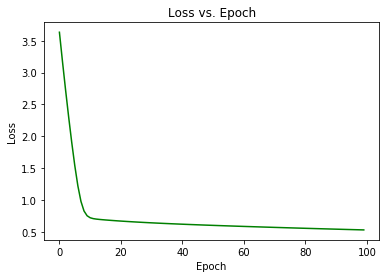

In [15]:
mlp=MLP(X.shape[1],32,.2)
mlp.fit(X, y, epochs=100, loss_func=True, verbose=True)
print("\nResults from Numpy Built Classifier\n")
y_preds= mlp.predict(X_test)
y_preds=mlp.convert_to_class(y_preds)
print("\nTrain Model Accuracy:",accuracy_score(y_train,mlp.convert_to_class(mlp.predict(X_train))))
print("\nTest Model Accuracy:",accuracy_score(y_test,y_preds))
print(classification_report(y_true=y_test, y_pred=y_preds))


## Q3 Exploring the bias-variance trade-off

#### A. 
Using `matplotlib` (see [here](https://https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=08RTGn_xE3MP)), plot train and test performances as a function of epochs

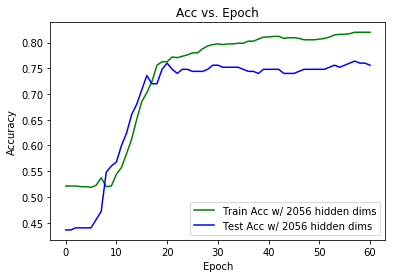

In [13]:
# mlp=MLP(X_train.shape[1],2056,.2)
# mlp.fit(X, y, epochs=100)
mlp.accuracy_plot(mlp.epoch_train_accuracy,mlp.epoch_test_accuracy)

#### B.
Let's see how additional hidden dims affect this (if at all)

There are 32 hidden dimensions

Initialized Weight Shapes:: w2= (32, 1) w1= (10, 32)

Initialized Bias Shapes:: b2= (1, 1) b1= (1, 32)
 
The shape of the data is:  (1000, 10)

------------------------------
There are 2056 hidden dimensions

Initialized Weight Shapes:: w2= (2056, 1) w1= (10, 2056)

Initialized Bias Shapes:: b2= (1, 1) b1= (1, 2056)
 
The shape of the data is:  (1000, 10)

------------------------------


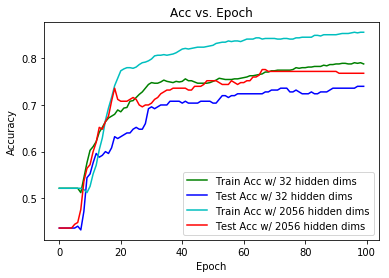

In [14]:
mlp=MLP(X_train.shape[1],32,.2)
mlp.fit(X, y, epochs=100)
mlp.accuracy_plot(mlp.epoch_train_accuracy,mlp.epoch_test_accuracy)
mlp=MLP(X_train.shape[1],2056,.2)
mlp.fit(X, y, epochs=100)
mlp.accuracy_plot(mlp.epoch_train_accuracy,mlp.epoch_test_accuracy,train_color='c',test_color='r')

So we can see the overfitting is more pronounced when we have more dimensions (free parameters)

## Q4 Modify your implementation above to be a multi-class MLP

We recommend making a copy of your code above; you may see why in your implementation.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore') #disregard initial confusion matrix

class MMLP:

    def __init__(self, input_size, output_size, hidden_dims=32, alpha=.2):
        '''
        Instantiate MLP using given parameters. 
        
        You may assume that there is only a single hidden layer
        (i.e., you need not generalize to handle arbitrary numbers of
        hidden layers).
        
        \alpha is the learning rate.
        '''
        assert(output_size > 1)
        self.hidden_dims= hidden_dims 
        print("There are {} hidden dimensions".format(self.hidden_dims))
        self.w1 = np.random.rand(input_size,self.hidden_dims) #w1 = [input_size x hidden_dims]
        self.w2 = np.random.rand(self.hidden_dims,output_size) #w2 = [hidden_dims x 1]
        self.bias1= np.random.rand(1,self.hidden_dims) 
        self.bias2= np.random.rand(1,output_size) 
        self.learn_rate= alpha
        print ("\nInitialized Weight Shapes:: w2=",self.w2.shape, "w1=", self.w1.shape )
        print ("\nInitialized Bias Shapes:: b2=",self.bias2.shape, "b1=", self.bias1.shape )
        print (" ")
        
        pass 

    def CrossEntropy(self, yHat, y,eps=1e-15):
        """
        Simplified Cross Entropy w.r. to each class 
        yHat is clipped for stability 
        """

        yHat= np.clip(yHat, eps, 1 - eps)
        return -np.sum(y * np.log(yHat))

    def sigmoid(self,x):
        """
        Params:
        ---

        x: nxd numpy array 

        Output:
        ---
        Result of Sigmoid "Squishing" Function: Array of vals in range {0,1}
        """
        return 1/(1 + np.exp(-x))
    
    def softmax(self,X):
        """
        Stabilized softmax function
        
        """
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps)
    
    
    def loss_plot(self,train_loss):
        """
        Show Log Loss Plot 
        """
        plt.figure(1)
        plt.plot(range(len(train_loss)),train_loss,color='g')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title("Loss vs. Epoch")
        plt.draw()
        
    def epoch_plot(self,train_results,test_results,result_topic, train_color='g',test_color='b'):
        """
        Show result_topic vs Loss Plot 
        result_topic= f1 score, precision, recall, etc. 
        """
        plt.plot(range(len(train_results)),train_results,color=train_color,
                       label='Train {} w/ {} hidden dims'.format(result_topic,self.hidden_dims))
        plt.plot(range(len(test_results)),test_results,color=test_color,
                 label='Test {} w/ {} hidden dims'.format(result_topic, self.hidden_dims))
        plt.xlabel('Epoch')
        plt.ylabel(str(result_topic))
        plt.title("{} vs. Epoch".format(result_topic))
        plt.legend()
        plt.draw()
    
    
    
    def one_hot(self,obj_class,num_classes=5):
        """
        obj_class:: current class of the object
        num_classes:: number of total classes 
        class --> encode class
        1 --> [0 1 0 0]
        
        """
        enc=np.zeros(num_classes)
        enc[obj_class]= 1
        return enc

    def convert_to_class(self,y_enc):
        """
        Convert to index encoding to class 
        [0 1 0 0] --> 1
        """
        return np.array([np.argmax((enc),axis=0) for enc in y_enc])
    

    def predict(self, x):
        '''
        Yield predictions \hat{y} for instances X. To match the data generation 
        process, return the index of the highest performing class.
        '''
        
        self.hidden_layer = self.sigmoid(np.dot(x,self.w1)+self.bias1) # hidden layer= sig(xW_1)
        y_hat= self.softmax(np.dot(self.hidden_layer,self.w2) + self.bias2) #sig(sig(xW_1)*W_2)
        return y_hat
    
    def confusion_matrix(self, actual, prediction):    
        
        """
        Calculate the confusion matrix; labels are numpy array of classification labels
        
        """
        num_classes= len(set(actual))
        cm = np.zeros((num_classes, num_classes))
        for a, p in zip(actual, prediction):
            cm[a][p] += 1
        return cm

    def precision(self,confusion_matrix,average = None):
        
        """
        From confusion matrix, determine precision. 
        If average is selected choose option for micro or macro 
        """

        if average== 'micro':
            return np.sum(np.diag(confusion_matrix)) / np.sum(np.sum(confusion_matrix, axis = 0))
        elif average== 'macro':
            return np.average(np.diag(confusion_matrix)/ np.sum(confusion_matrix, axis = 0))
        pass 
        return np.diag(confusion_matrix)/ np.sum(confusion_matrix, axis = 0)

    def recall(self,confusion_matrix,average = None):
        
        """
        From confusion matrix, determine recall. 
        If average is selected choose option for micro or macro 
        """
        
        if average== 'micro':
            return np.sum(np.diag(confusion_matrix)) / np.sum(np.sum(confusion_matrix, axis = 1))
        elif average== 'macro':
            return np.average(np.diag(confusion_matrix)/ np.sum(confusion_matrix, axis = 1))
        else: 
            return np.diag(confusion_matrix)/ np.sum(confusion_matrix, axis = 1)


    def f1(self,confusion_matrix,average = None):
        """
        From confusion matrix, determine f1 score. 
        If average is selected choose option for micro or macro 
        """

        if average== 'micro':
            p  = self.precision(confusion_matrix,average='micro')
            r = self.recall(confusion_matrix,average='micro')
        elif average== 'macro':
            p  = self.precision(confusion_matrix)
            r = self.recall(confusion_matrix)
            return np.average(np.nan_to_num( 2 * p * r / (p + r)))
        else:  
            p  = self.precision(confusion_matrix)
            r = self.recall(confusion_matrix)

        return np.nan_to_num(2 * p * r / (p + r))

    def create_report(self, actual, prediction):
        """
        From actual and predicition values, create sklearn equivalent  
        of classification_report 
        """
        
        cm = self.confusion_matrix(actual, prediction)
        print ("Confusion Matrix:\n------------------\n",cm,"\n")
        import pandas as pd
        ind = np.arange(len(set(actual))).tolist()
        ind.extend(['','micro avg','macro avg'])
        p_list= self.precision(cm).tolist()
        p_list.extend(['',self.precision(cm,'micro'),self.precision(cm,'macro')])
        r_list=self.recall(cm).tolist()
        r_list.extend(['',self.recall(cm,'micro'),self.recall(cm,'macro')])
        f_list= self.f1(cm).tolist()
        f_list.extend(['',self.f1(cm,'micro'),self.f1(cm,'macro')])
        
        print("Report:\n------------------\n")

        print(pd.DataFrame({"Precision:":p_list,
                      "Recall:":r_list,
                     "f1_score:":f_list},index=ind))
        
    def fit(self, X, y, epochs=100, random_state=42,loss_func=False,verbose=False):
        '''
        Train the model via backprop for the specified number of epochs.
       
        '''
        print ("The shape of the data is: ",X.shape)
        print ("\n------------------------------")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=random_state)
        ##SGD 
        y_train_enc=np.array([self.one_hot(obj_class,num_classes=len(set(y))) for obj_class in y_train])
        #y_test_enc=np.array([self.one_hot(obj_class,num_classes=len(set(y))) for obj_class in y_test])
        
        training_loss=[]
        
        #accuracy test, train
        epoch_train_accuracy=[]
        self.epoch_train_accuracy=epoch_train_accuracy
        epoch_test_accuracy=[]
        self.epoch_test_accuracy=epoch_test_accuracy
        
        #precision test, train
        epoch_train_precision=[]
        self.epoch_train_precision=epoch_train_precision
        epoch_test_precision=[]
        self.epoch_test_precision=epoch_test_precision
        
        #recall test, train
        epoch_train_recall=[]
        self.epoch_train_recall=epoch_train_recall
        epoch_test_recall=[]
        self.epoch_test_recall=epoch_test_recall
        
        #f1 macro test, train
        epoch_train_f1_macro=[]
        self.epoch_train_f1_macro=epoch_train_f1_macro
        epoch_test_f1_macro=[]
        self.epoch_test_f1_macro=epoch_test_f1_macro
        
        #f1 macro test, train
        epoch_train_f1_micro=[]
        self.epoch_train_f1_micro=epoch_train_f1_micro
        epoch_test_f1_micro=[]
        self.epoch_test_f1_micro=epoch_test_f1_micro
        
        #for epoch 
        for epoch in range(epochs): #loop through all training data
            #run through each element in the batch
            loss= []
            epoch_y_train=[]
            epoch_y_test=[]
            for i,x in enumerate(X_train): 
        
                
                x= np.expand_dims(x,axis=0)
                
                
                
                prediction= self.predict(x) #sig(weights*x) gives the class probaility
                
                loss.append(self.CrossEntropy(y_train_enc[i],prediction)) #get the loss for row 

                #return None
                #Back Prop 
                dw_2= np.dot(self.hidden_layer.T,(y_train_enc[i]-prediction))
                dw_1=np.dot(x.T,(np.dot((y_train_enc[i]-prediction),self.w2.T)*self.hidden_layer*(1-self.hidden_layer)))
                db_2= y_train_enc[i]-prediction
                db_1= np.dot((y_train_enc[i]-prediction),self.w2.T)*self.hidden_layer*(1-self.hidden_layer)
          
                #update weights 
                self.w1 += self.learn_rate*(dw_1/len(y_train))
                self.w2 += self.learn_rate*(dw_2/len(y_train))
                self.bias1 += self.learn_rate*(db_1/len(y_train))
                self.bias2 += self.learn_rate*(db_2/len(y_train))
                
                #validation_loss.append(val_loss)
                epoch_y_train.append(self.convert_to_class(prediction)) #get all the predictions for each item in training batch
        
            epoch_y_test= self.predict(X_test) #get all the predictions for each item in training batch
                 
            #get confusion matrix 
            cm_train = self.confusion_matrix(y_train,epoch_y_train)
            cm_test = self.confusion_matrix(y_test, self.convert_to_class(epoch_y_test))
            
            
            #accuracy 
            self.epoch_train_accuracy.append(accuracy_score(y_train,epoch_y_train))
            self.epoch_test_accuracy.append(accuracy_score(y_test,self.convert_to_class(epoch_y_test)))
            
            #precision 
            self.epoch_train_precision.append(self.precision(cm_train,'macro'))
            self.epoch_test_precision.append(self.precision(cm_test,'macro'))
            
            #recall
            self.epoch_train_recall.append(self.recall(cm_train,'macro'))
            self.epoch_test_recall.append(self.recall(cm_test,'macro'))
        
            
            #f1 macro
            self.epoch_train_f1_macro.append(self.f1(cm_train,'macro'))
            self.epoch_test_f1_macro.append(self.f1(cm_test,'macro'))
            
            #f1 micro
            self.epoch_train_f1_micro.append(self.f1(cm_train,'micro'))
            self.epoch_test_f1_micro.append(self.f1(cm_test,'micro'))
            
            training_loss.append(np.average(loss))
            if verbose == True:
                if epoch % 100 == 0:
                    print ("\n For Epoch:", epoch, "With Training Loss:", np.around(np.average(loss),decimals=6))
                    pass 
        
        if loss_func == True:
            self.loss_plot(training_loss)
            pass 


There are 32 hidden dimensions

Initialized Weight Shapes:: w2= (32, 5) w1= (10, 32)

Initialized Bias Shapes:: b2= (1, 5) b1= (1, 32)
 
The shape of the data is:  (2000, 10)

------------------------------

 For Epoch: 0 With Training Loss: 27.536928

 For Epoch: 100 With Training Loss: 22.130675

 For Epoch: 200 With Training Loss: 19.724756

 For Epoch: 300 With Training Loss: 18.330834

 For Epoch: 400 With Training Loss: 17.428301


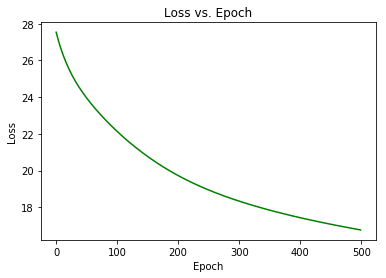

In [20]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=10, n_informative=8,n_redundant = 2,
                           n_classes=5) 


multi_class_mlp=MMLP(X.shape[1], output_size=5, hidden_dims=32, alpha=.2)
multi_class_mlp.fit(X, y, epochs=500, loss_func=True, verbose=True)

## Q5 Implement Precision, Recall, micro-averaged F1, macro-averaged F1

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Results from Numpy Built Multi Class Classifier\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
y_preds= multi_class_mlp.predict(X_test)
y_preds= multi_class_mlp.convert_to_class(y_preds)
print(classification_report(y_true=y_test, y_pred=y_preds))


Results from Numpy Built Multi Class Classifier

              precision    recall  f1-score   support

           0       0.58      0.57      0.57        93
           1       0.48      0.42      0.45       109
           2       0.58      0.71      0.64        92
           3       0.66      0.65      0.66        95
           4       0.79      0.76      0.77       111

   micro avg       0.62      0.62      0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg       0.62      0.62      0.62       500



In [22]:
multi_class_mlp.create_report(y_test,y_preds)

Confusion Matrix:
------------------
 [[53. 16.  8.  7.  9.]
 [12. 46. 32. 15.  4.]
 [ 8. 12. 65.  3.  4.]
 [ 7. 15.  6. 62.  5.]
 [12.  7.  1.  7. 84.]] 

Report:
------------------

          Precision:   Recall: f1_score:
0           0.576087  0.569892  0.572973
1           0.479167  0.422018   0.44878
2           0.580357  0.706522  0.637255
3           0.659574  0.652632  0.656085
4           0.792453  0.756757  0.774194
                                        
micro avg       0.62      0.62      0.62
macro avg   0.617528  0.621564  0.617857


## Q6 Explore the bias-variance trade-off for multi-class classification.

You should: 


*  Use sklearn `make_classification` to create a simple dataset comprising 2000 samples -- be sure to include both informative and noisy features! Use 5 classes for the moment.
* Split this into equal sized disjoint train and test sets. 
* Instantiate your MMLP and fit to the train data
* Explore bias/variance/precision/recall trade-offs as defined in the homework.

You might wish to check your model against `sklearn.neural_network.MLP` but we do not require this.

In [23]:
%%time
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


## 32 Dims 
multi_class_mlp_32=MMLP(X.shape[1],5,32,.2)
multi_class_mlp_32.fit(X, y, epochs=100)

## 256 Dims
multi_class_mlp_256=MMLP(X.shape[1],5,2056,.2)
multi_class_mlp_256.fit(X, y, epochs=100)

print ("32 and 256 Hidden Layer Fitted Repectively")

There are 32 hidden dimensions

Initialized Weight Shapes:: w2= (32, 5) w1= (10, 32)

Initialized Bias Shapes:: b2= (1, 5) b1= (1, 32)
 
The shape of the data is:  (2000, 10)

------------------------------
There are 2056 hidden dimensions

Initialized Weight Shapes:: w2= (2056, 5) w1= (10, 2056)

Initialized Bias Shapes:: b2= (1, 5) b1= (1, 2056)
 
The shape of the data is:  (2000, 10)

------------------------------
32 and 256 Hidden Layer Fitted Repectively
CPU times: user 3min 17s, sys: 1.11 s, total: 3min 18s
Wall time: 50.3 s


### Accuracy 

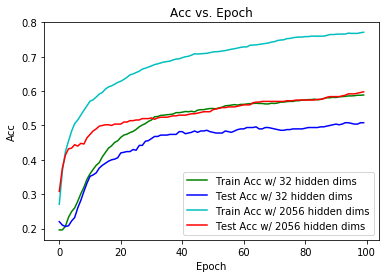

In [24]:
multi_class_mlp_32.epoch_plot(multi_class_mlp_32.epoch_train_accuracy,multi_class_mlp_32.epoch_test_accuracy,'Acc')
multi_class_mlp_256.epoch_plot(multi_class_mlp_256.epoch_train_accuracy,multi_class_mlp_256.epoch_test_accuracy,'Acc',train_color='c',test_color='r')

### Precision (MACRO) :: To get micro change code in main class function above ^^^^

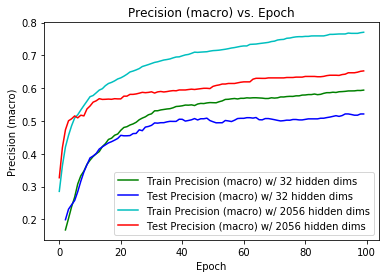

In [25]:
multi_class_mlp_32.epoch_plot(multi_class_mlp_32.epoch_train_precision,multi_class_mlp_32.epoch_test_precision,'Precision (macro)')
multi_class_mlp_256.epoch_plot(multi_class_mlp_256.epoch_train_precision,multi_class_mlp_256.epoch_test_precision,'Precision (macro)',train_color='c',test_color='r')


### Recall (MACRO) :: To get micro change code in main class function above ^^^^

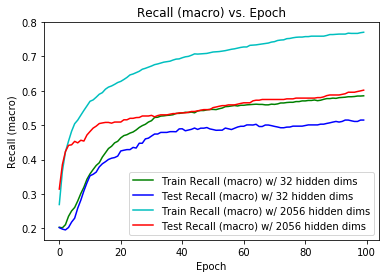

In [26]:
multi_class_mlp_32.epoch_plot(multi_class_mlp_32.epoch_train_recall,multi_class_mlp_32.epoch_test_recall,'Recall (macro)')
multi_class_mlp_256.epoch_plot(multi_class_mlp_256.epoch_train_recall,multi_class_mlp_256.epoch_test_recall,'Recall (macro)',train_color='c',test_color='r')


### F1 Score (MICRO) :

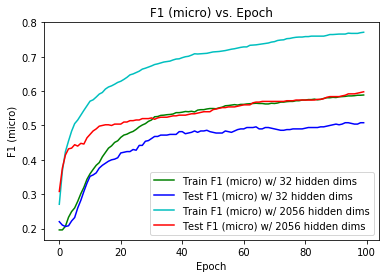

In [27]:
multi_class_mlp_32.epoch_plot(multi_class_mlp_32.epoch_train_f1_micro,multi_class_mlp_32.epoch_test_f1_micro,'F1 (micro)')
multi_class_mlp_256.epoch_plot(multi_class_mlp_256.epoch_train_f1_micro,multi_class_mlp_256.epoch_test_f1_micro,'F1 (micro)',train_color='c',test_color='r')

### F1 Score (MACRO) :

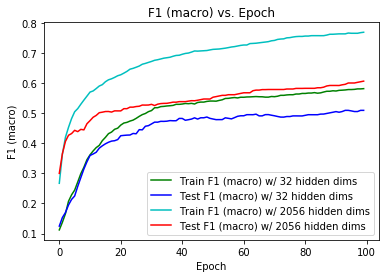

In [28]:
multi_class_mlp_32.epoch_plot(multi_class_mlp_32.epoch_train_f1_macro,multi_class_mlp_32.epoch_test_f1_macro,'F1 (macro)')
multi_class_mlp_256.epoch_plot(multi_class_mlp_256.epoch_train_f1_macro,multi_class_mlp_256.epoch_test_f1_macro,'F1 (macro)',train_color='c',test_color='r')